<a href="https://colab.research.google.com/github/Peksyaji/Orbit-AI-Mastery/blob/main/KNN_Study_Case_Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Wayan123/dataset-ml/main/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
# Cek duplikasi data
df.duplicated().sum()

1

In [ ]:
# Menghapus data duplikat
df.drop_duplicates(inplace=True)

In [ ]:
# Melihat ukuran data
df.shape

(302, 14)

# EDA

<AxesSubplot:xlabel='target', ylabel='count'>

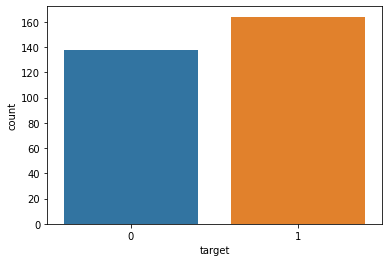

In [ ]:
# Distribusi variabel target
sns.countplot(df['target'])

- Jumlah nilai 0 dan 1 cukup seimbang
- Nilai 0 untuk penyakit jantung
- Nilai 1 untuk bukan penyakit jantung

In [ ]:
print('Rata-rata usia: ', df['age'].mean())
print('Modus usia: ', df['age'].mode())

Rata-rata usia:  54.420529801324506
Modus usia:  0    58
dtype: int64


<AxesSubplot:xlabel='age'>

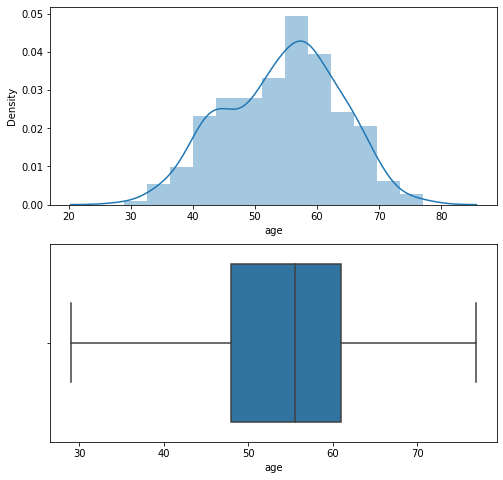

In [ ]:
# Distribusi variabel age
f = plt.figure(figsize=(8,8))
f.add_subplot(2,1,1)
sns.distplot(df['age'])
f.add_subplot(2,1,2)
sns.boxplot(df['age'])

- Variabel age memiliki distribusi mendekati normal
- Rata-rata usia dan modus nya masing-masing adalah 54,42 tahun dan 58 tahun
- Tidak ada outlier

<AxesSubplot:>

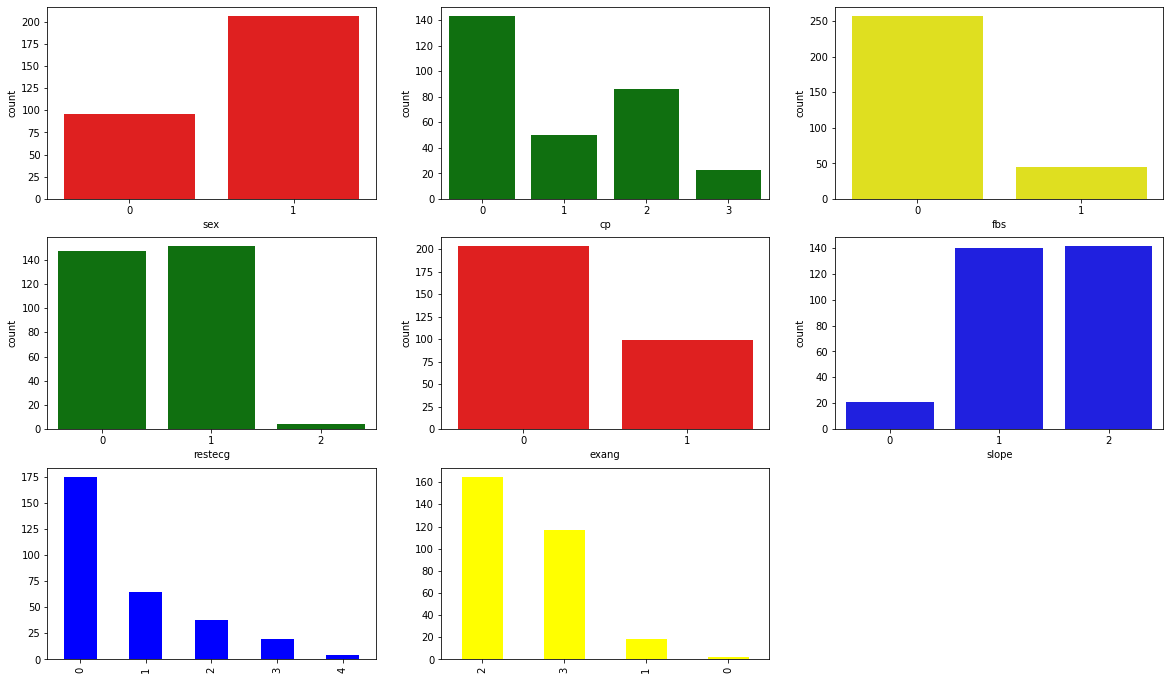

In [ ]:
# Distribusi variabel diskrit
f = plt.figure(figsize=(20,12))
f.add_subplot(3,3,1)
sns.countplot(df['sex'], color='red')
f.add_subplot(3,3,2)
sns.countplot(df['cp'], color='green')
f.add_subplot(3,3,3)
sns.countplot(df['fbs'], color='yellow')
f.add_subplot(3,3,4)
sns.countplot(df['restecg'], color='green')
f.add_subplot(3,3,5)
sns.countplot(df['exang'], color='red')
f.add_subplot(3,3,6)
sns.countplot(df['slope'], color='blue')
f.add_subplot(3,3,7)
df['ca'].value_counts().plot.bar(color='blue')
f.add_subplot(3,3,8)
df['thal'].value_counts().plot.bar(color='yellow')

- Jumlah pasien laki-laki 2 kali lebih banyak dari pasien perempuan
- Paling banyak pasien memiliki tipe cp 0 yaitu typical angine dan paling sedikit bertipe 3 yaitu asymptomatic
- Nilai fasting blood sugar banyak sekali yang dibawah 120 atau bernilai 0
- Dapat dilihat bahwa nilai 0 dan 1 hampir berimbang sementara itu, untuk nilai 2 pada variabel restecg sangat sedikit yaitu dibawah 10
- Nilai 0 sekitar 2x lipat dari nilai 1 yang berarti yaitu pasien tidak mengalami induced angine saat exercise lebih banyak daripada yang mengalami induced saat exercise
- Variabel slope nilai 1 yaitu flat dan 2 yaitu downsloping memiliki nilai yang hampir sama yaitu sekitar 140 dan nilai 0 dimana itu merupakan upsloping mempunyai nilai sangat sedikit yaitu sekitar 20
- Untuk variabel ca, nilai paling banyak adalah 0 yang memiliki jumlah major vessels sebanyak 0 dan paling sedikit adalah 4
- Sedangkan untuk variabel thal sebagian besar di nilai 2 dan paling sedikit adalah nilai 0

In [ ]:
print('Rata-rata resting blood pressure: ', df['trestbps'].mean())

Rata-rata resting blood pressure:  131.60264900662253


<AxesSubplot:xlabel='trestbps'>

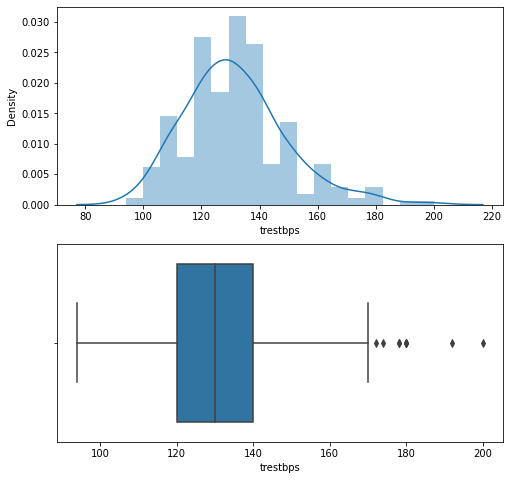

In [ ]:
f = plt.figure(figsize=(8,8))
f.add_subplot(2,1,1)
sns.distplot(df['trestbps'])
f.add_subplot(2,1,2)
sns.boxplot(df['trestbps'])

In [ ]:
df_sub = df.loc[:,'trestbps']
# Mencari nilai IQR
iqr = df_sub.quantile(0.75) - df_sub.quantile(0.25)
# Menghitung banyaknya outlier
df.loc[df_sub > (df_sub.quantile(0.75) + 3/2*iqr),:].shape

(15, 14)

In [ ]:
print('Nilai maksimum resting blood pressure: ', df['trestbps'].max())

Nilai maksimum resting blood pressure:  200


- Rata-rata resting blood pressure bernilai 131.603 mmHg
- Mayoritas nilai resting blood pressure adalah 120-140 mmHg
- Data berdistribusi seperti distribusi normal
- Terdapat 15 nilai outlier
- Nilai maksimal varibel ini adalah 200 mmHg

In [ ]:
print('Rata-rata kolesterol: ', df['chol'].mean())

Rata-rata kolesterol:  246.5


<AxesSubplot:xlabel='chol'>

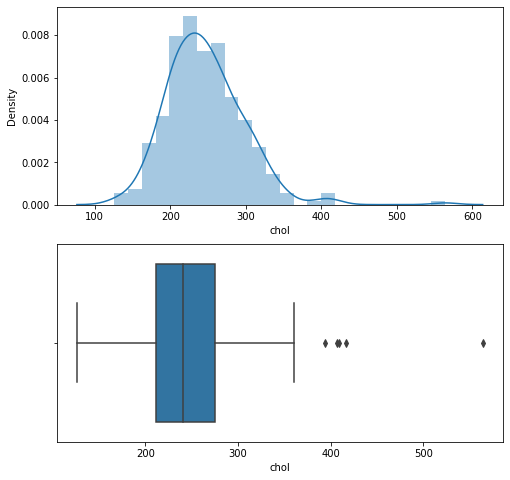

In [ ]:
f = plt.figure(figsize=(8,8))
f.add_subplot(2,1,1)
sns.distplot(df['chol'])
f.add_subplot(2,1,2)
sns.boxplot(df['chol'])

In [ ]:
df_sub = df.loc[:,'chol']
# Mencari nilai IQR
iqr = df_sub.quantile(0.75) - df_sub.quantile(0.25)
# Menghitung banyaknya outlier
print(df.loc[df_sub > (df_sub.quantile(0.75) + 3/2*iqr),:].shape)
print('Nilai maksimum kolesterol: ', df['chol'].max())

(11, 14)
Nilai maksimum kolesterol:  564


- Data pada variabel kolestrol cenderung berdistribusi normal
- Rata-rata pada variabel ini adalah 246.5 mg/dl
- Terdapat 11 outlier dengan nilai maksimalnya adalah 564 mg/dl

In [ ]:
print('Modus maxium heart rate: ', df['thalach'].mode())

Modus maxium heart rate:  0    162
dtype: int64


<AxesSubplot:xlabel='thalach'>

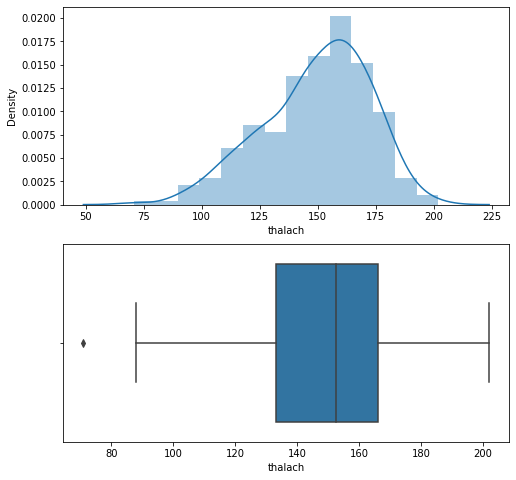

In [ ]:
f = plt.figure(figsize=(8,8))
f.add_subplot(2,1,1)
sns.distplot(df['thalach'])
f.add_subplot(2,1,2)
sns.boxplot(df['thalach'])

In [ ]:
df_sub = df.loc[:,'thalach']
# Mencari nilai IQR
iqr = df_sub.quantile(0.75) - df_sub.quantile(0.25)
# Menghitung banyaknya outlier
print(df.loc[df_sub < (df_sub.quantile(0.25) - 3/2*iqr),:].shape)
print('Nilai minimum dari maximum heart rate: ', df['thalach'].min())

(8, 14)
Nilai minimum dari maximum heart rate:  71


- Variabel maximum heart rate cenderung berdistribusi normal
- Modus pada variabel ini adalah 162
- Terdapat 8 outlier dengan nilai 71 

<AxesSubplot:xlabel='oldpeak'>

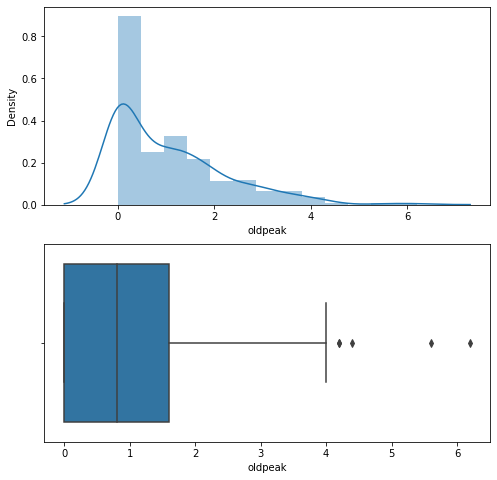

In [ ]:
f = plt.figure(figsize=(8,8))
f.add_subplot(2,1,1)
sns.distplot(df['oldpeak'])
f.add_subplot(2,1,2)
sns.boxplot(df['oldpeak'])

In [ ]:
df_sub = df.loc[:,'oldpeak']
# Mencari nilai IQR
iqr = df_sub.quantile(0.75) - df_sub.quantile(0.25)
# Menghitung banyaknya outlier
print(df.loc[df_sub > (df_sub.quantile(0.75) + 3/2*iqr),:].shape)
print('Nilai maksimum dari oldpeak: ', df['oldpeak'].max())

(17, 14)
Nilai maksimum dari oldpeak:  6.2


- Data tidak berdistribusi normal
- Data memiliki outlier berjumlah 17 data
- Nilai maksimum dari data ini nadalah 6,2

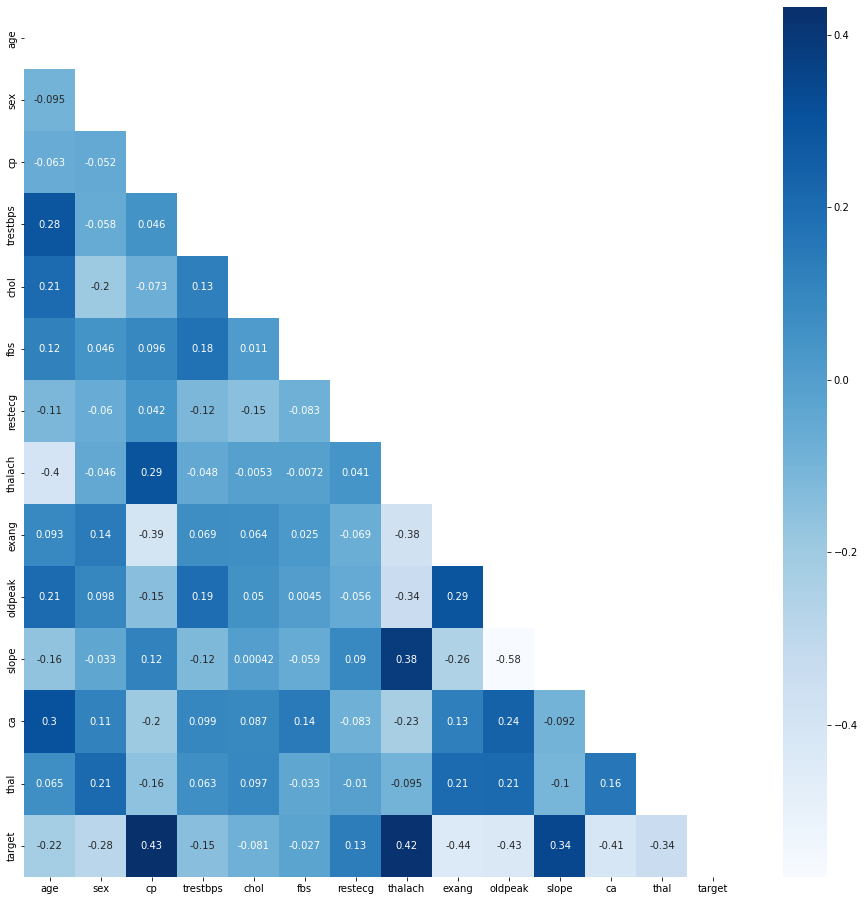

In [ ]:
# Cek korelasi
corr = df.corr()
plt.figure(figsize=(16,16))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap="Blues", annot=True)
plt.show()

- Terdapat variabel independen yang berkorelasi positif cukup kuat dengan variabel dependen, yaitu cp, thalach, dan slope
- Terdapat variabel independen yang berkorelasi negatif cukup kuat dengan variabel dependen, yaitu exang, oldpeak, ca, dan thal
- Antar variabel independen cenderung tidak saling berkorelasi dengan kuat

In [ ]:
# Standarisasi
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.iloc[:,:13])
df_standar = scaler.transform(df.iloc[:,:13])
df_standar = pd.DataFrame(df_standar, columns=df.iloc[:,:13].columns)
df_standar.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.949794,0.682656,1.976470,0.764066,-0.261285,2.389793,-1.002541,0.018826,-0.698344,1.084022,-2.271182,-0.714911,-2.147955
1,-1.928548,0.682656,1.005911,-0.091401,0.067741,-0.418446,0.901657,1.636979,-0.698344,2.118926,-2.271182,-0.714911,-0.513994
2,-1.485726,-1.464866,0.035352,-0.091401,-0.822564,-0.418446,-1.002541,0.980971,-0.698344,0.307844,0.979514,-0.714911,-0.513994
3,0.174856,0.682656,0.035352,-0.661712,-0.203222,-0.418446,0.901657,1.243374,-0.698344,-0.209608,0.979514,-0.714911,-0.513994
4,0.285561,-1.464866,-0.935208,-0.661712,2.080602,-0.418446,0.901657,0.587366,1.431958,-0.382092,0.979514,-0.714911,-0.513994


Plot distribusi dari: age


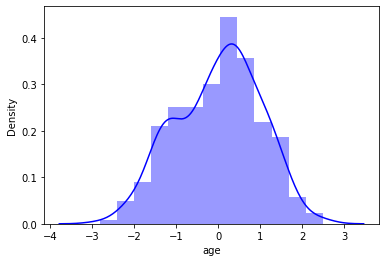

Plot distribusi dari: sex


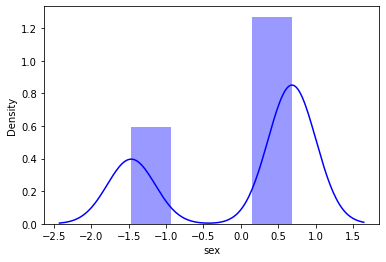

Plot distribusi dari: cp


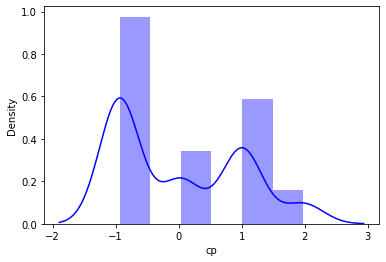

Plot distribusi dari: trestbps


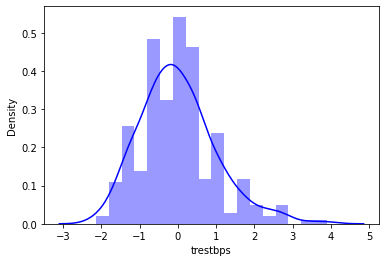

Plot distribusi dari: chol


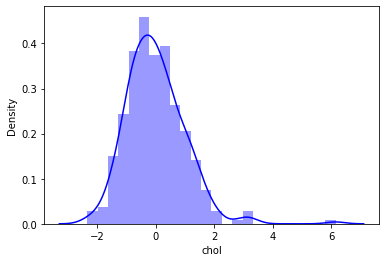

Plot distribusi dari: fbs


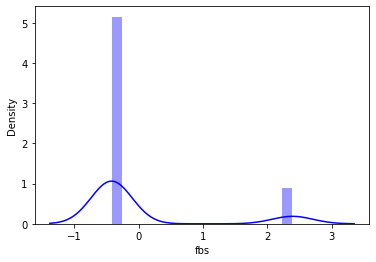

Plot distribusi dari: restecg


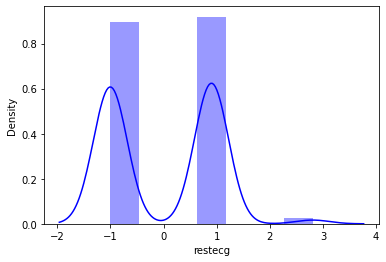

Plot distribusi dari: thalach


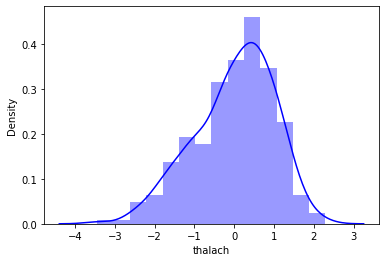

Plot distribusi dari: exang


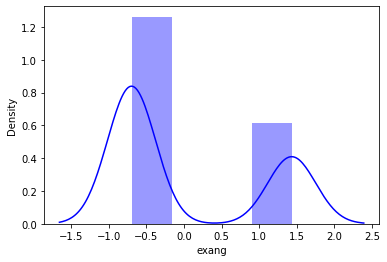

Plot distribusi dari: oldpeak


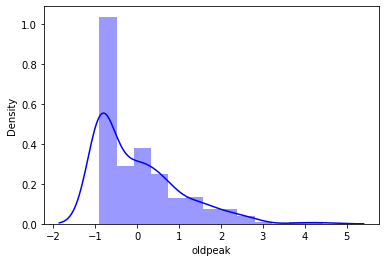

Plot distribusi dari: slope


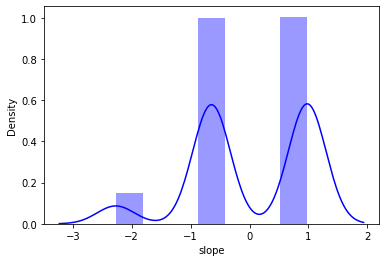

Plot distribusi dari: ca


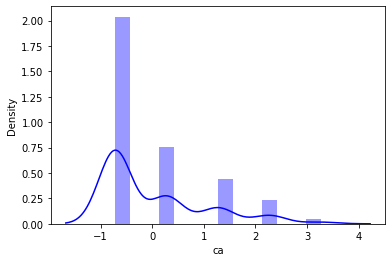

Plot distribusi dari: thal


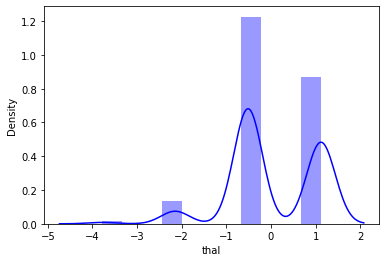

In [ ]:
# Plot distribusi setelah stadarisasi
for i, var in enumerate(df_standar):
    print('Plot distribusi dari:', var)
    sns.distplot(df_standar[var], color='blue')
    plt.show()

# KNN Modelling

In [ ]:
# Membagi variabel bebas dan variabel terikat
X = df_standar
y = df.iloc[:,13]

In [ ]:
# Split data kedalam training dan testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
# Membuat object KNN
knn = KNeighborsClassifier()
# Training the model
knn.fit(x_train, y_train)
# Predict testing set
y_pred = knn.predict(x_test)

In [ ]:
# Check performa model menggunakan classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.81      0.80        43
           1       0.85      0.82      0.84        57

    accuracy                           0.82       100
   macro avg       0.82      0.82      0.82       100
weighted avg       0.82      0.82      0.82       100



In [ ]:
print('Skor pada data latih: {:.4f}'.format(knn.score(x_train, y_train)))

Skor pada data latih: 0.8960


In [ ]:
# Hyperparameters
knn_2 = KNeighborsClassifier()
hyperparameters = {'leaf_size' : [i for i in range(1, 50)],
                   'n_neighbors' : [i for i in range(1, 30)],
                   'p' : [1,2]
}
clf = GridSearchCV(
    estimator=knn_2,
    param_grid=hyperparameters,
    cv=5,
    verbose=1,
    n_jobs=-1
)
best_model = clf.fit(X, y)

Fitting 5 folds for each of 2842 candidates, totalling 14210 fits


In [ ]:
#Nilai hyperpaameters terbaik
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 1
Best n_neighbors: 4


In [ ]:
y_pred = best_model.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86        43
           1       0.92      0.84      0.88        57

    accuracy                           0.87       100
   macro avg       0.87      0.87      0.87       100
weighted avg       0.88      0.87      0.87       100



In [ ]:
roc_auc_score(y_test, y_pred)

0.8745410036719707

# Kesimpulan
- Data bersih dari missing value tetapi memiliki duplikasi dan beberapa outlier
- Data cendering berdistribusi normal meski terdapat variabel yang tidak berdistribusi normal
- Dilakukan standar scaler untuk menyeragamkan data dan meningkatkan akurasi model
- Sebelum mencari hyperparameter, model memiliki akurasi 82% kemudian setelah ditentukan hyperparameternya menjadi 87%
- Score dari AUC sebesar 87,45%